In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callbacks.hooks import *
from fastai.imports import *

import os

import warnings
warnings.filterwarnings("ignore")

print(os.listdir("./dataset/"))

['processo', 'boletos']


In [2]:
img_dir='./dataset/'
path = Path(img_dir)

In [3]:
data = ImageDataBunch.from_folder(path, 
                                  train=".",
                                  valid_pct=0.2,
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

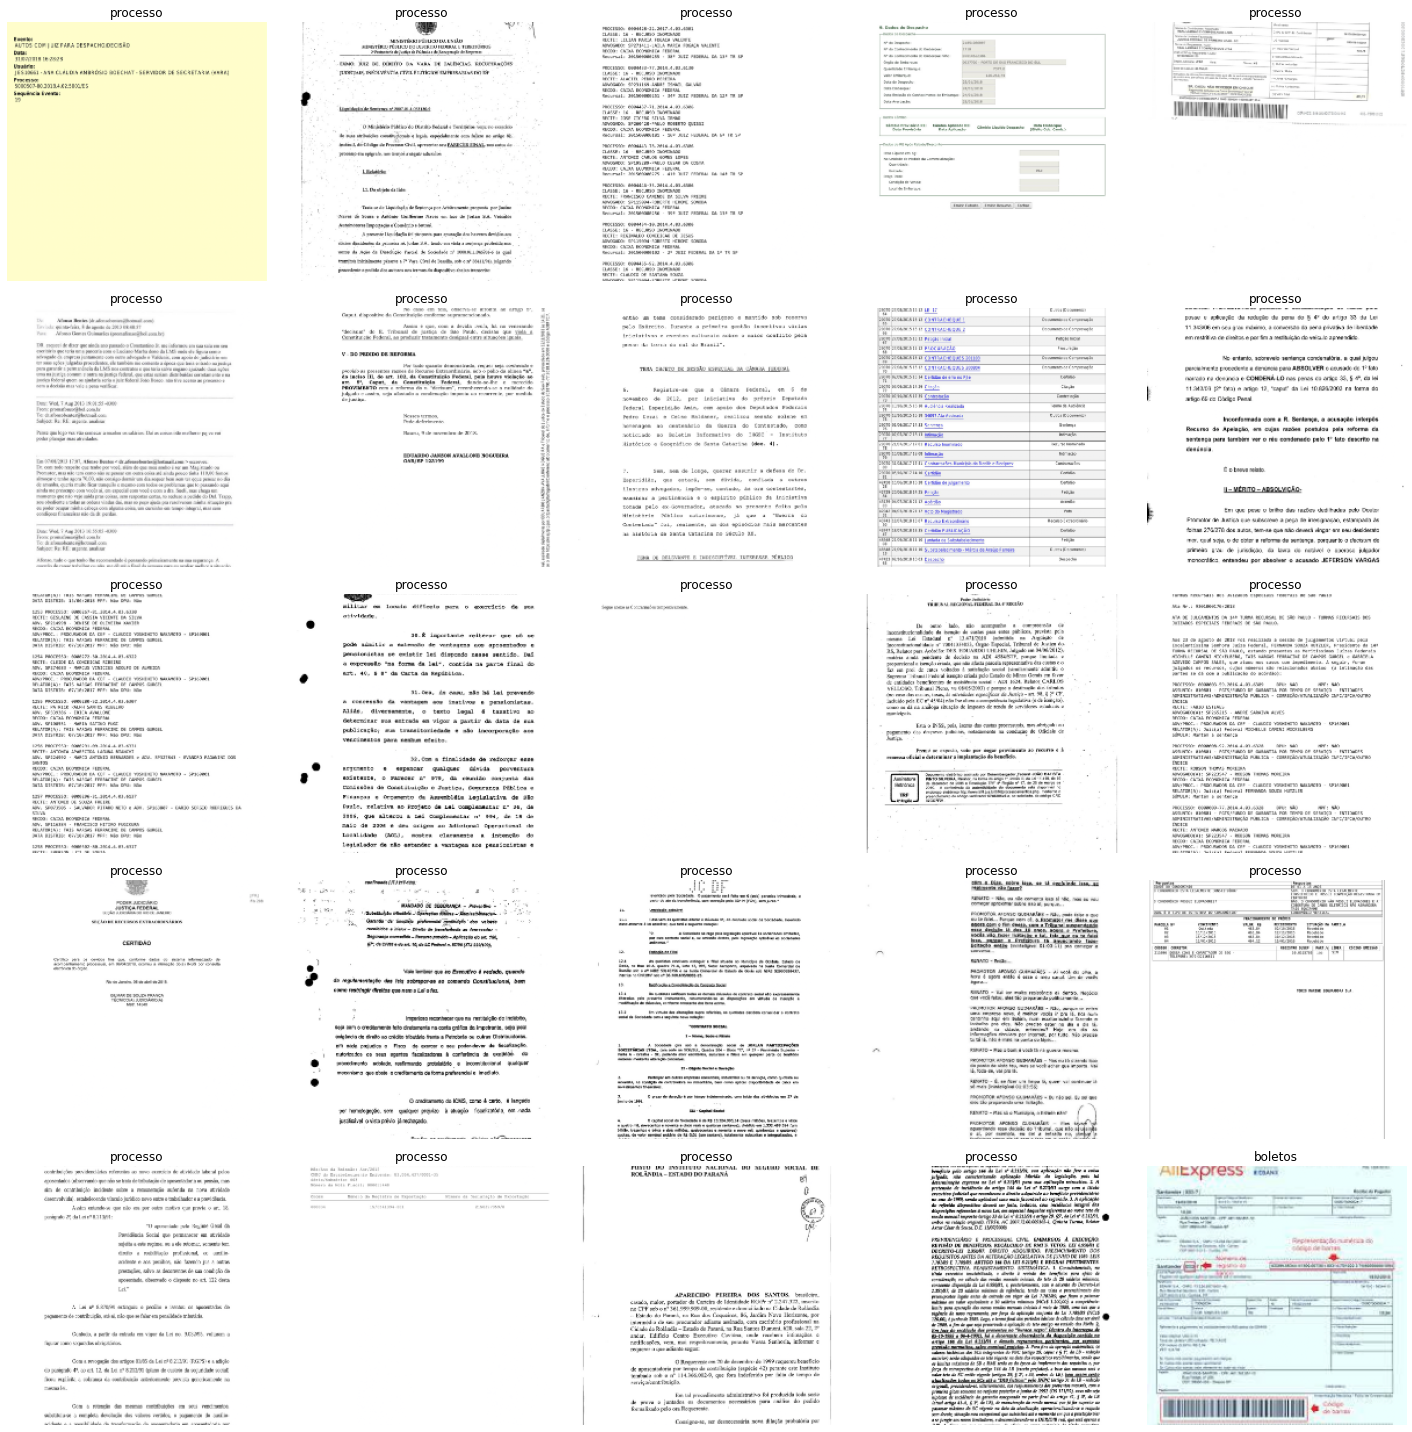

In [4]:
data.show_batch(rows=5)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], model_dir="./model/")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


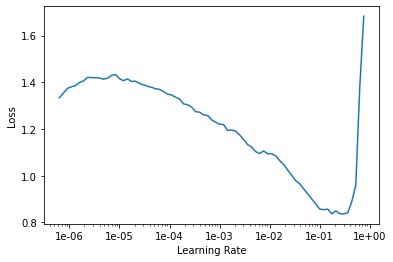

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
learn_rate = 1e-02
learn.fit_one_cycle(6, slice(learn_rate))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.460929,0.093944,0.979439,0.020561,21:31
1,0.154414,0.013220,0.996262,0.003738,21:22
2,0.051644,0.002355,0.999065,0.000935,21:20
3,0.017811,0.000553,1.000000,0.000000,21:25
4,0.007945,0.000891,0.999065,0.000935,21:35
5,0.002873,0.001633,0.999065,0.000935,21:29


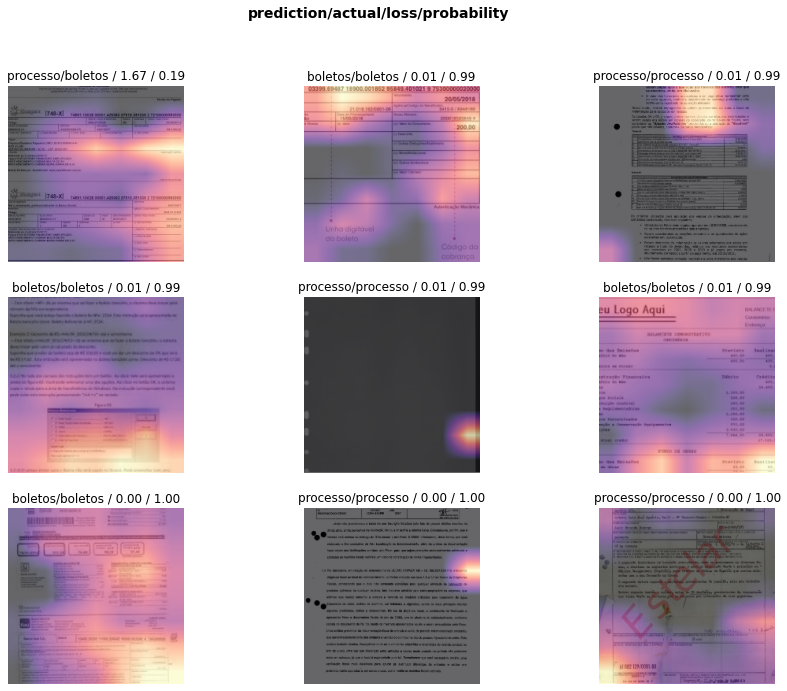

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

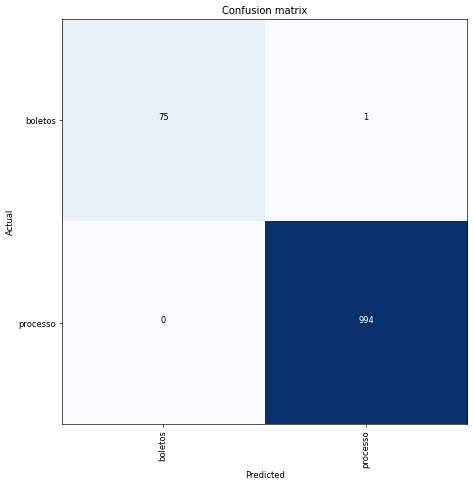

In [9]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [10]:
learn.export()

In [11]:
# Métricas no dado de Validação

In [12]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [13]:
preds, y = learn.get_preds(ds_type=DatasetType.Valid)

In [14]:
labels = np.argmax(preds, 1)

In [15]:
print('f1-score: '+str(f1_score(y, labels)))
print('accuracy: '+str(accuracy_score(y, labels)))

f1-score: 0.9994972347913524
accuracy: 0.9990654205607477


In [16]:
confusion_matrix(y, labels)

array([[ 75,   1],
       [  0, 994]])

In [17]:
# Métricas no dado de Teste

In [18]:
learn.data.add_test(ImageList.from_folder('../teste/'))

In [19]:
preds, y = learn.get_preds(ds_type=DatasetType.Test)

In [20]:
labels = np.argmax(preds, 1)
labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
y = []
for x in range(250):
    y.append(1)

for x in range(50):
    y.append(0)

In [22]:
torch.tensor(y)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
print('f1-score: '+str(f1_score(y, labels)))
print('accuracy: '+str(accuracy_score(y, labels)))

f1-score: 0.9090909090909091
accuracy: 0.8333333333333334


In [24]:
confusion_matrix(y, labels)

array([[  0,  50],
       [  0, 250]])

In [25]:
test_predictions_direct = [data.classes[int(x)] for x in labels]

In [26]:
len([x for x in test_predictions_direct if x == 'boletos'])

0